In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df['PassengerId'][0].split('_')[1]

'01'

In [ ]:
data = df.drop(columns = ['Cabin','PassengerId', 'Name'], axis=1)

In [ ]:
HomePlanet = pd.get_dummies(data['HomePlanet'], drop_first=True)

In [ ]:
HomePlanet

,Europa,Mars
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
8688,1,0
8689,0,0
8690,0,0
8691,1,0


In [ ]:
CryoSleep = pd.get_dummies(data['CryoSleep'], drop_first=True)
Destination = pd.get_dummies(data['Destination'], drop_first=True)
VIP = pd.get_dummies(data['VIP'], drop_first=True)

In [ ]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
data['HomePlanet']=data['HomePlanet'].fillna(value = 'Earth')

In [ ]:
data.isnull().sum()

HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
data['CryoSleep']=data['CryoSleep'].fillna(value = 'False')

In [ ]:
data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
data['Destination']=data['Destination'].fillna(value = 'TRAPPIST-1e')

In [ ]:
data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

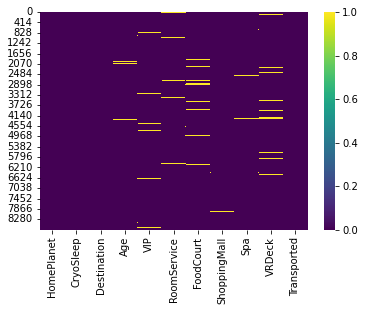

In [ ]:
sns.heatmap(data.isnull(),cmap = 'viridis')

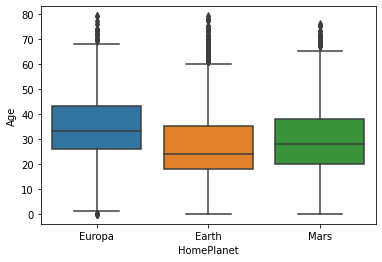

In [ ]:
sns.boxplot(x='HomePlanet', y='Age', data = data)

In [ ]:
def impute_age(cols):

  Age = cols[0]
  HomePlanet = cols[1]

  if pd.isnull(Age):
    if HomePlanet == 'Earth':
      return 24
    elif HomePlanet == 'Europa':
       return 34
    
    else:

      return 30
  else:
    return Age

In [ ]:
data['Age'] = data[['Age', 'HomePlanet']].apply(impute_age, axis=1)

In [ ]:
data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
data['VIP']=data['VIP'].fillna(value = 'False')

In [ ]:
data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

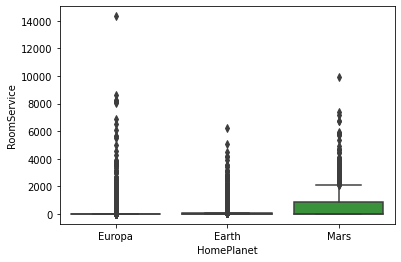

In [ ]:
sns.boxplot(x='HomePlanet', y='RoomService', data = data)

In [ ]:
data['RoomService']=data['RoomService'].fillna(value = data['RoomService'].mean())

In [ ]:
data['FoodCourt']=data['FoodCourt'].fillna(value = data['FoodCourt'].median())
data['ShoppingMall']=data['ShoppingMall'].fillna(value = data['ShoppingMall'].median())
data['Spa']=data['Spa'].fillna(value = data['Spa'].median())
data['VRDeck']=data['VRDeck'].fillna(value = data['VRDeck'].median())


In [ ]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [ ]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
HomePlanet = pd.get_dummies(data['HomePlanet'], drop_first=True)
CryoSleep = pd.get_dummies(data['CryoSleep'], drop_first=True)
Destination = pd.get_dummies(data['Destination'], drop_first=True)
VIP = pd.get_dummies(data['VIP'], drop_first=True)
final_df = pd.concat([data,HomePlanet, CryoSleep, Destination, VIP],axis=1)

In [ ]:
final_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,0,1,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,1,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,0,0,1,1,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,0,0,1,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,1,0,0


In [ ]:
final_df = final_df.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis =1)

In [ ]:
final_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,1,0,0


In [ ]:
final_df.isnull().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Europa           0
Mars             0
True             0
False            0
PSO J318.5-22    0
TRAPPIST-1e      0
True             0
False            0
dtype: int64

In [ ]:
X = final_df.drop(['Transported'],axis =1)

In [ ]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,1,0,0


In [ ]:
columns = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
std_data = min_max_scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
std_data

array([[4.93670886e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.03797468e-01, 7.60801284e-03, 3.01881729e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.34177215e-01, 3.00132617e-03, 1.19947674e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.29113924e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.05063291e-01, 0.00000000e+00, 3.51859927e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.56962025e-01, 8.79458365e-03, 1.57246839e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X = pd.DataFrame(std_data, columns=[columns])

In [ ]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.isnull().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Europa           0
Mars             0
True             0
False            0
PSO J318.5-22    0
TRAPPIST-1e      0
True             0
False            0
dtype: int64

In [ ]:
y = final_df['Transported'].astype('int')

In [ ]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[730 147]
 [231 631]]


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       877
           1       0.81      0.73      0.77       862

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier(n_neighbors=100)

In [ ]:
pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(confusion_matrix(y_test,pred))

[[723 154]
 [242 620]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(C=10, gamma=0.0001)

In [ ]:
svm.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


SVC(C=10, gamma=0.0001)

In [ ]:
predictions = svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(confusion_matrix(y_test,predictions))

[[766 111]
 [354 508]]


In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
data_test = df_test.drop(columns = ['Cabin','PassengerId', 'Name'], axis=1)

In [ ]:
data_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
data_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [ ]:
data_test['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [ ]:
data_test['HomePlanet']=data_test['HomePlanet'].fillna(value = 'Earth')
data_test['FoodCourt']=data_test['FoodCourt'].fillna(value = data['FoodCourt'].median())
data_test['ShoppingMall']=data_test['ShoppingMall'].fillna(value = data['ShoppingMall'].median())
data_test['Spa']=data_test['Spa'].fillna(value = data['Spa'].median())
data_test['VRDeck']=data_test['VRDeck'].fillna(value = data['VRDeck'].median())
data_test['Destination']=data_test['Destination'].fillna(value = 'TRAPPIST-1e')
data_test['VIP']=data_test['VIP'].fillna(value = 'False')
data_test['CryoSleep']=data_test['CryoSleep'].fillna(value = 'False')

In [ ]:
data_test['RoomService']=data_test['RoomService'].fillna(value = data['RoomService'].mean())

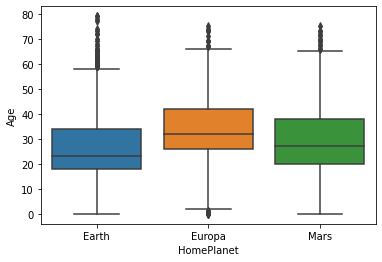

In [ ]:
sns.boxplot(x='HomePlanet', y='Age', data = data_test)

In [ ]:
def impute_age(cols):

  Age = cols[0]
  HomePlanet = cols[1]

  if pd.isnull(Age):
    if HomePlanet == 'Earth':
      return 24
    elif HomePlanet == 'Europa':
       return 32
    
    else:

      return 28
  else:
    return Age

In [ ]:
data_test['Age'] = data_test[['Age', 'HomePlanet']].apply(impute_age, axis=1)

In [ ]:
data_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
data_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
HomePlanet_test1 = pd.get_dummies(data_test['HomePlanet'], drop_first=True)
CryoSleep_test1 = pd.get_dummies(data_test['CryoSleep'], drop_first=True)
Destination_test1 = pd.get_dummies(data_test['Destination'], drop_first=True)
VIP_test1 = pd.get_dummies(data_test['VIP'], drop_first=True)

In [ ]:
final_test = pd.concat([data_test,HomePlanet_test1, CryoSleep_test1, Destination_test1, VIP_test1],axis=1)

In [ ]:
final_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,1,0,0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,1,0,0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,1,0,0


In [ ]:
final_test = final_test.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis =1)

In [ ]:
final_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,0,1,0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,0,1,0,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,0,1,0,0


In [ ]:
final_test.isnull().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Europa           0
Mars             0
True             0
False            0
PSO J318.5-22    0
TRAPPIST-1e      0
True             0
False            0
dtype: int64

In [ ]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            4277 non-null   float64
 1   RoomService    4277 non-null   float64
 2   FoodCourt      4277 non-null   float64
 3   ShoppingMall   4277 non-null   float64
 4   Spa            4277 non-null   float64
 5   VRDeck         4277 non-null   float64
 6   Europa         4277 non-null   uint8  
 7   Mars           4277 non-null   uint8  
 8   True           4277 non-null   uint8  
 9   False          4277 non-null   uint8  
 10  PSO J318.5-22  4277 non-null   uint8  
 11  TRAPPIST-1e    4277 non-null   uint8  
 12  True           4277 non-null   uint8  
 13  False          4277 non-null   uint8  
dtypes: float64(6), uint8(8)
memory usage: 234.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
std_data1 = min_max_scaler.fit_transform(final_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X = pd.DataFrame(std_data1, columns=[columns])

In [ ]:
columns

Index([          'Age',   'RoomService',     'FoodCourt',  'ShoppingMall',
                 'Spa',        'VRDeck',        'Europa',          'Mars',
                  True,         'False', 'PSO J318.5-22',   'TRAPPIST-1e',
                  True,         'False'],
      dtype='object')

In [ ]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,True,False,PSO J318.5-22,TRAPPIST-1e,True,False
0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.240506,0.000000,0.000356,0.00000,0.142260,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.481013,0.000000,0.263206,0.00000,0.009121,0.026266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.253165,0.000865,0.000000,0.07658,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
pred = svm.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
pred = pred.astype(np.bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
pred

array([ True, False,  True, ...,  True, False,  True])

In [ ]:
Transported = pd.DataFrame({'Transported': pred[:]})

In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_test = pd.concat([df_test, Transported], axis =1)

In [ ]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,True
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False


In [ ]:
final_prediction = df_test[["PassengerId", "Transported"]]

In [ ]:
final_prediction.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

In [ ]:
final_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
final_prediction.to_csv("Prediction.csv", index = False)